In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics as st

In [ ]:
data_condiciones_vida = pd.read_csv("TB_SEC_XII.csv")

In [4]:
data_recursos_sociales = pd.read_csv("TB_SEC_XVI.csv")

In [5]:
data_violencia_actual = pd.read_csv("TB_SEC_XIV.csv")

In [6]:
data_violencia_actual2 = pd.read_csv("TB_SEC_XIV_2.csv", low_memory=False)

In [250]:
data_12meses = pd.read_csv("TB_VD.csv")
data_internet = pd.read_csv("AMIPCI.csv")

In [91]:
#Tamaño de población de la ENDIREH 2021
data_12meses.shape


(110127, 42)

In [92]:
#Filtros por delegación y tabla de ENDIREH 2021
data_condiciones_vida = data_condiciones_vida[data_condiciones_vida['NOM_MUN'].str.contains('GUSTAVO A. MADERO')]
data_recursos_sociales = data_recursos_sociales[data_recursos_sociales['NOM_MUN'].str.contains('GUSTAVO A. MADERO')]
data_violencia_actual = data_violencia_actual[data_violencia_actual['NOM_MUN'].str.contains('GUSTAVO A. MADERO')]
data_violencia_actual2 = data_violencia_actual2[data_violencia_actual2['NOM_MUN'].str.contains('GUSTAVO A. MADERO')]
data_12meses = data_12meses[data_12meses['NOM_MUN'].str.contains('GUSTAVO A. MADERO')]

In [14]:
#Tamaño de datos filtrados

In [93]:
data_12meses.shape

(378, 42)

In [16]:
#Cálculo de muestreo aleatorio simple de la muestra

In [94]:
data_12meses = data_12meses.sample( n = 370 )
#Tamaño de muestra después del cálculo aleatorio
data_12meses.shape

(370, 42)

In [95]:
#Despliegue de las primeras 5 filas de la muestra simple
data_12meses.head()

,ID_VIV,ID_PER,UPM,VIV_SEL,HOGAR,N_REN,DOMINIO,CVE_ENT,NOM_ENT,CVE_MUN,...,VCOM_A,VCOM_12M,VFAM,VPAR_A,VPAR_12M,FAC_VIV,FAC_MUJ,ESTRATO,UPM_DIS,EST_DIS
27878,904268.02,0904268.02.1.02,904268,2,1,2,U,9,CIUDAD DE M…XICO,5,...,2,2,2,1.0,1.0,792,792,2,4964,154
27975,905086.01,0905086.01.1.02,905086,1,1,2,U,9,CIUDAD DE M…XICO,5,...,1,1,1,2.0,2.0,650,650,2,4986,154
27989,905245.01,0905245.01.1.03,905245,1,1,3,U,9,CIUDAD DE M…XICO,5,...,2,2,2,2.0,2.0,754,1508,2,4989,154
27972,905080.03,0905080.03.3.09,905080,3,3,9,U,9,CIUDAD DE M…XICO,5,...,2,2,2,2.0,2.0,606,2422,2,4985,154
27884,904369.04,0904369.04.1.02,904369,4,1,2,U,9,CIUDAD DE M…XICO,5,...,1,2,2,2.0,2.0,1060,2120,2,4965,154


In [96]:
#Frecuencia de estado civil de mujeres en la GAM
pd.value_counts(data_12meses['T_INSTRUM'])

A1    183
C1     69
B1     49
B2     44
C2     19
A2      6
Name: T_INSTRUM, dtype: int64

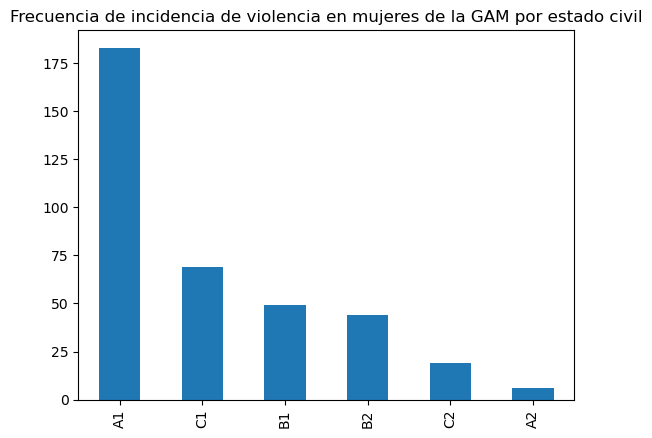

In [97]:
plot = (data_12meses['T_INSTRUM']).value_counts().plot(kind='bar', title = 'Frecuencia de incidencia de violencia en mujeres de la GAM por estado civil')

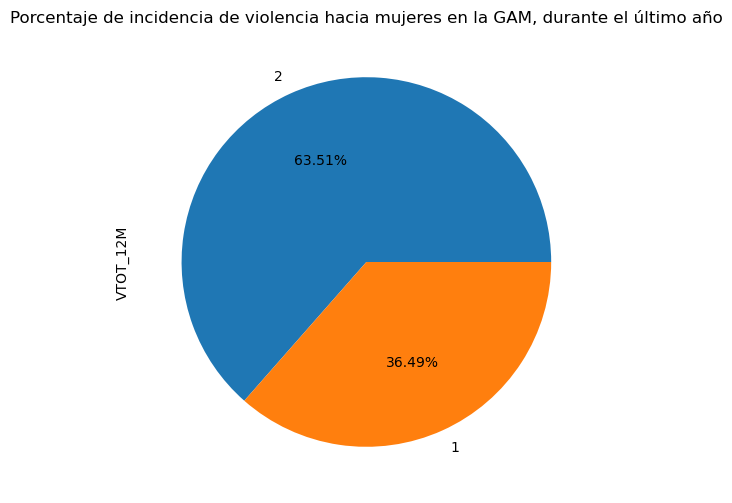

In [98]:
# Gráfico de pie de incidencia de violencia en la GAM
plot = (data_12meses['VTOT_12M']).value_counts().plot(kind='pie', autopct='%.2f%%', 
                                            figsize=(6, 6),
                                            title='Porcentaje de incidencia de violencia hacia mujeres en la GAM, durante el último año')

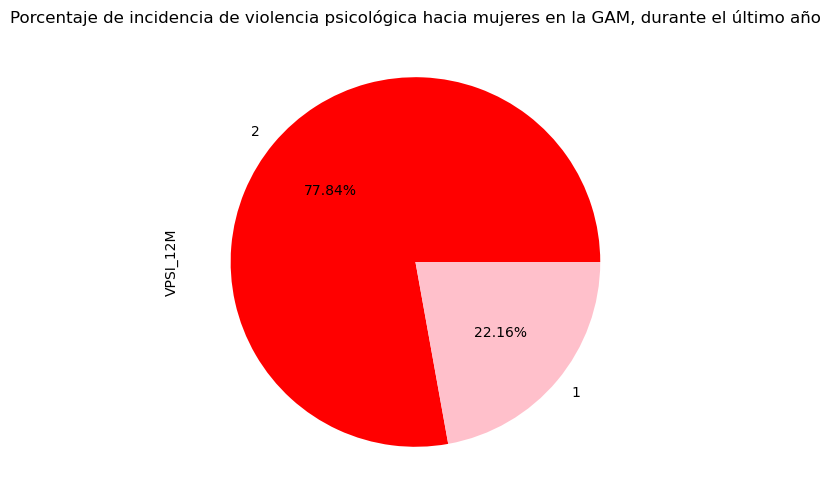

In [99]:
plot = (data_12meses['VPSI_12M']).value_counts().plot(kind='pie', autopct='%.2f%%',  colors=["red", "pink"],
                                            figsize=(6, 6),
                                            title='Porcentaje de incidencia de violencia psicológica hacia mujeres en la GAM, durante el último año')

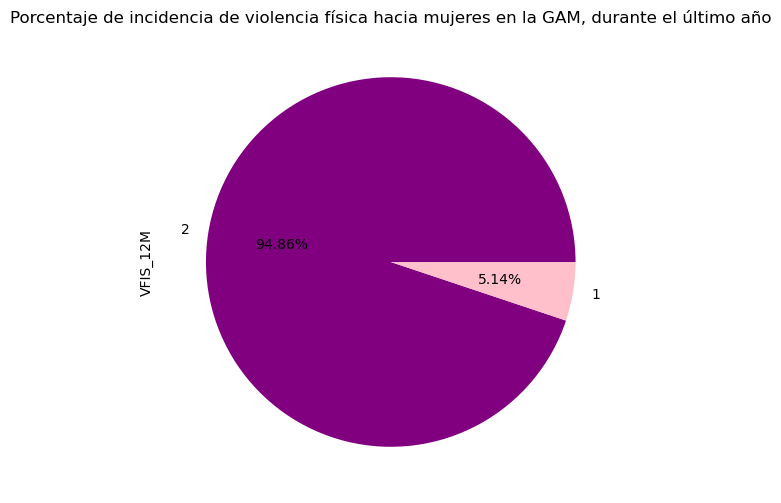

In [100]:
plot = (data_12meses['VFIS_12M']).value_counts().plot(kind='pie', autopct='%.2f%%',  colors=["purple", "pink"],
                                            figsize=(6, 6),
                                            title='Porcentaje de incidencia de violencia física hacia mujeres en la GAM, durante el último año')

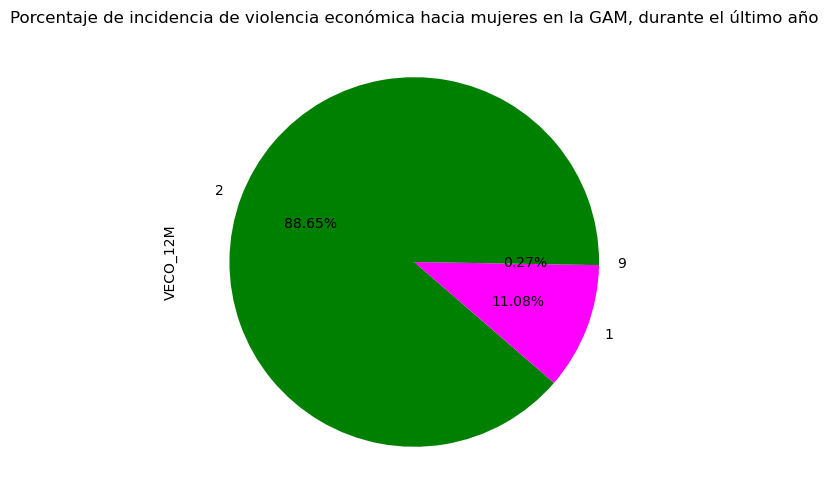

In [80]:
plot = (data_12meses['VECO_12M']).value_counts().plot(kind='pie', autopct='%.2f%%',  colors=["green", "magenta"],
                                            figsize=(6, 6),
                                            title='Porcentaje de incidencia de violencia económica hacia mujeres en la GAM, durante el último año')

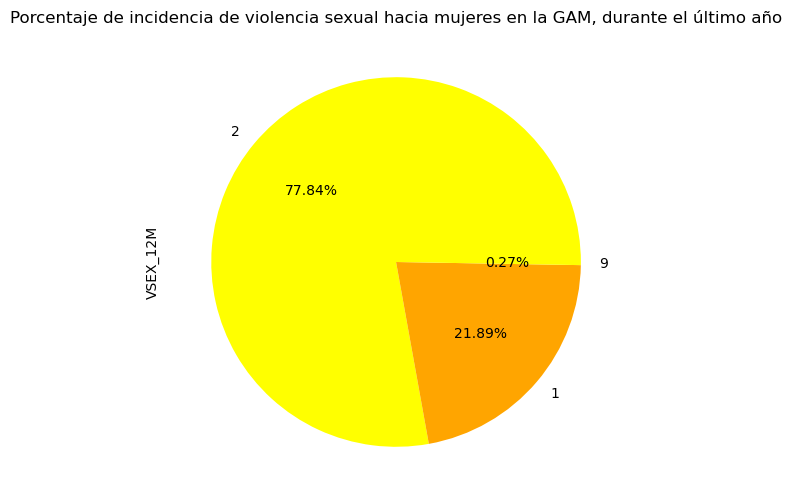

In [85]:
plot = (data_12meses['VSEX_12M']).value_counts().plot(kind='pie', autopct='%.2f%%',  colors=["yellow", "orange"],
                                            figsize=(6, 6),
                                            title='Porcentaje de incidencia de violencia sexual hacia mujeres en la GAM, durante el último año')

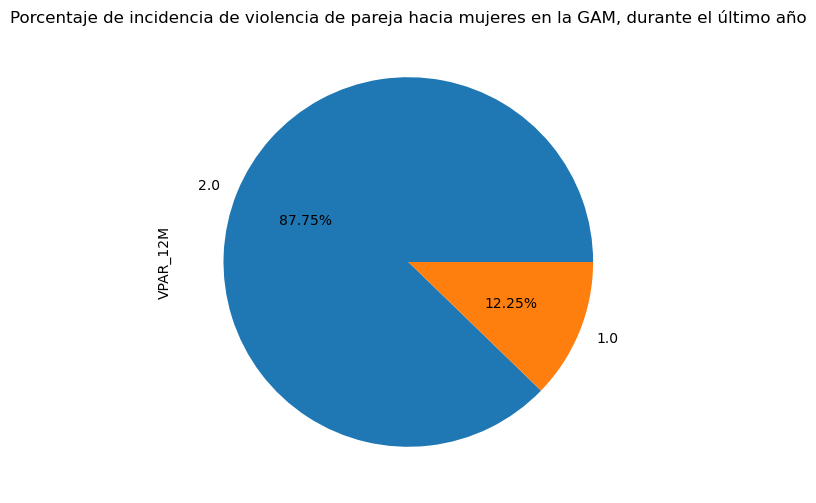

In [90]:
plot = (data_12meses['VPAR_12M']).value_counts().plot(kind='pie', autopct='%.2f%%',
                                            figsize=(6, 6),
                                            title='Porcentaje de incidencia de violencia de pareja hacia mujeres en la GAM, durante el último año')

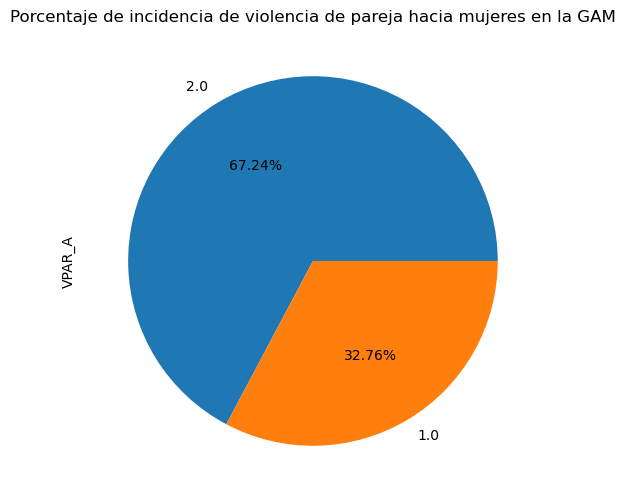

In [91]:
plot = (data_12meses['VPAR_A']).value_counts().plot(kind='pie', autopct='%.2f%%',
                                            figsize=(6, 6),
                                            title='Porcentaje de incidencia de violencia de pareja hacia mujeres en la GAM')

In [101]:
# Tabla de contingencia Estado civil / estrato socioeconómico
pd.crosstab(index=data_12meses['T_INSTRUM'],
            columns=data_12meses['ESTRATO'], margins=True)

ESTRATO,1,2,3,4,All
T_INSTRUM,,,,,
A1,2,95,67,19,183
A2,0,3,2,1,6
B1,1,27,17,4,49
B2,0,14,27,3,44
C1,0,32,26,11,69
C2,1,5,8,5,19
All,4,176,147,43,370


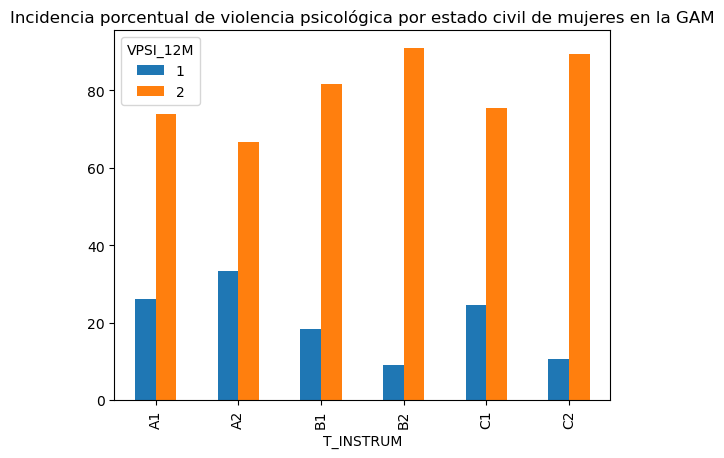

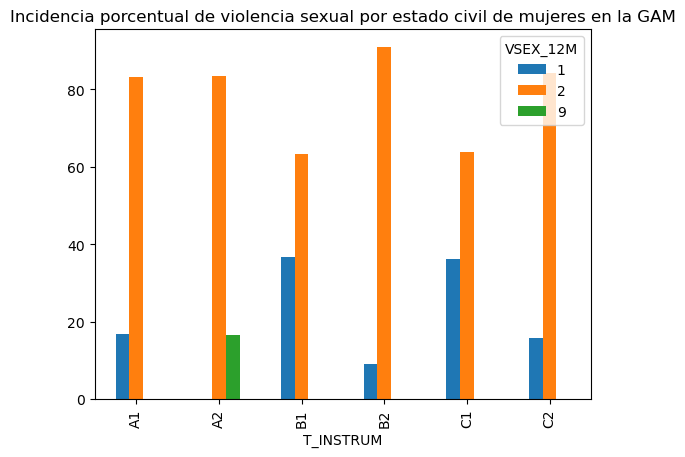

In [181]:
plot = pd.crosstab(index=data_12meses['T_INSTRUM'],
            columns=data_12meses['VPSI_12M']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', title = 'Incidencia porcentual de violencia psicológica por estado civil de mujeres en la GAM')
plot = pd.crosstab(index=data_12meses['T_INSTRUM'],
            columns=data_12meses['VSEX_12M']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', title = 'Incidencia porcentual de violencia sexual por estado civil de mujeres en la GAM')

In [169]:
data_correlacion = pd.crosstab(index=[data_12meses['VPSI_12M'],data_12meses['T_INSTRUM']],
            columns=data_12meses['ESTRATO'])
data_correlacion_sex = pd.crosstab(index= [data_12meses['VSEX_12M'], data_12meses['T_INSTRUM']],
            columns=data_12meses['ESTRATO'])

In [170]:
#Correlación de violencia psicológica de
#acuerdo al estado civil de la víctima
data_correlacion

ESTRATO             1   2   3   4
VPSI_12M T_INSTRUM               
1        A1         0  34  13   1
         A2         0   2   0   0
         B1         0   8   1   0
         B2         0   2   2   0
         C1         0  10   7   0
         C2         0   1   1   0
2        A1         2  61  54  18
         A2         0   1   2   1
         B1         1  19  16   4
         B2         0  12  25   3
         C1         0  22  19  11
         C2         1   4   7   5

In [171]:
#Correlación de violencia sexual de 
#acuerdo al estado civil de la víctima
data_correlacion_sex

ESTRATO             1   2   3   4
VSEX_12M T_INSTRUM               
1        A1         0  24   3   4
         B1         0  13   5   0
         B2         0   2   2   0
         C1         0  15  10   0
         C2         0   1   2   0
2        A1         2  71  64  15
         A2         0   2   2   1
         B1         1  14  12   4
         B2         0  12  25   3
         C1         0  17  16  11
         C2         1   4   6   5
9        A2         0   1   0   0

In [172]:
#Correlación de violencia psicológica con el método Pearson
data_correlacion.corr(method = "pearson")

ESTRATO,1,2,3,4
ESTRATO,,,,
1,1.000000,0.677983,0.739575,0.766600
2,0.677983,1.000000,0.897397,0.802821
3,0.739575,0.897397,1.000000,0.887225
4,0.766600,0.802821,0.887225,1.000000


In [173]:
#Correlación de violencia sexual con el método Pearson
data_correlacion_sex.corr(method = "pearson")

ESTRATO,1,2,3,4
ESTRATO,,,,
1,1.000000,0.733957,0.758743,0.709622
2,0.733957,1.000000,0.911888,0.808382
3,0.758743,0.911888,1.000000,0.815170
4,0.709622,0.808382,0.815170,1.000000


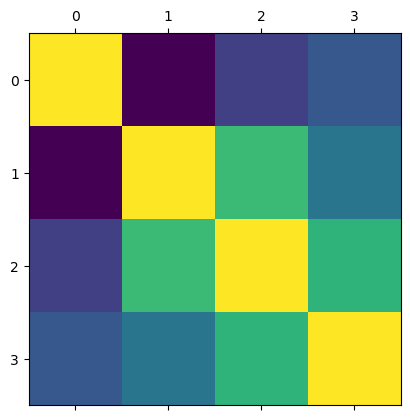

In [174]:
#Mapa de calor de la correlación de violencia psicológica
plt.matshow(data_correlacion.corr())

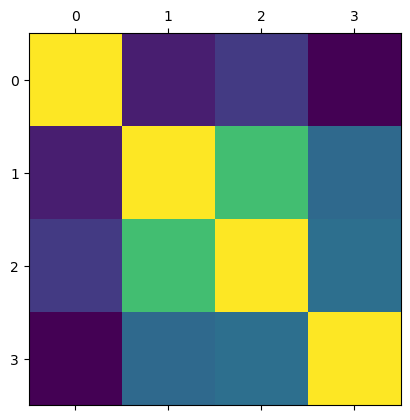

In [175]:
#Mapa de calor de la correlación de violencia sexual
plt.matshow(data_correlacion_sex.corr())

In [176]:
#Desviación estandar por estrato en temas de violencia psicológica
data_correlacion.std()

ESTRATO
1     0.651339
2    17.772979
3    15.475053
4     5.583390
dtype: float64

In [177]:
#Desviación estandar por estrato en temas de violencia sexual
data_correlacion_sex.std()

ESTRATO
1     0.651339
2    19.270011
3    17.843384
4     4.851585
dtype: float64

In [178]:
data_correlacion.var()

ESTRATO
1      0.424242
2    315.878788
3    239.477273
4     31.174242
dtype: float64

In [179]:
data_correlacion.describe()

ESTRATO,1,2,3,4
count,12.000000,12.000000,12.000000,12.000000
mean,0.333333,14.666667,12.250000,3.583333
std,0.651339,17.772979,15.475053,5.583390
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.750000,0.000000
50%,0.000000,9.000000,7.000000,1.000000
75%,0.250000,19.750000,16.750000,4.250000
max,2.000000,61.000000,54.000000,18.000000


In [180]:
data_correlacion_sex.describe()

ESTRATO,1,2,3,4
count,12.000000,12.000000,12.000000,12.000000
mean,0.333333,14.666667,12.250000,3.583333
std,0.651339,19.270011,17.843384,4.851585
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,0.000000
50%,0.000000,12.500000,5.500000,2.000000
75%,0.250000,15.500000,13.000000,4.250000
max,2.000000,71.000000,64.000000,15.000000


In [251]:
#Exposición de datos tomados de AMIPCI
data_internet

,fecha,t_inter,mujeres
0,2016,65.0,32.5
1,2017,70.0,35.7
2,2018,79.1,40.4
3,2019,82.7,42.2
4,2020,87.4,44.6
5,2021,84.1,42.7
6,2022,88.6,45.9


In [216]:

from sklearn.model_selection import train_test_split

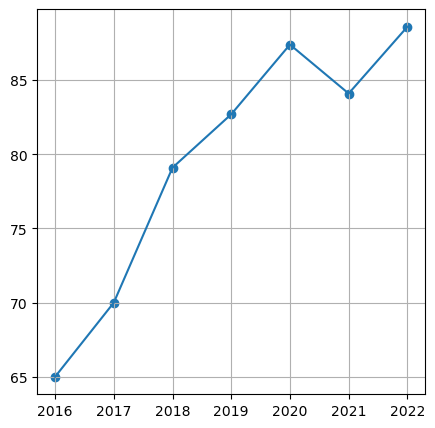

In [252]:
#Gráfica de los datos de la tabla de AMIPCI
graph = plt.figure(figsize = (5, 5))
plt.scatter(data_internet['fecha'], data_internet['t_inter'])
plt.plot(data_internet['fecha'], data_internet['t_inter'])
plt.xlabel = ("Año")
plt.ylabel = ("Usuarios con acceso a Internet")
plt.grid()

In [254]:
#Lectura de keys de la tabla
data_internet.keys()

Index(['fecha', 't_inter', 'mujeres'], dtype='object')

In [233]:
nFecha = data_internet['fecha'].values.reshape(-1,1)
nInter = data_internet['t_inter'].values.reshape(-1,1)

#Regresión lineal de usuarios de internet
linear_regressor = LinearRegression()
linear_regressor.fit(nFecha, nInter)
nInter_pred = linear_regressor.predict(nFecha)
nInter_pred

In [240]:
m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]


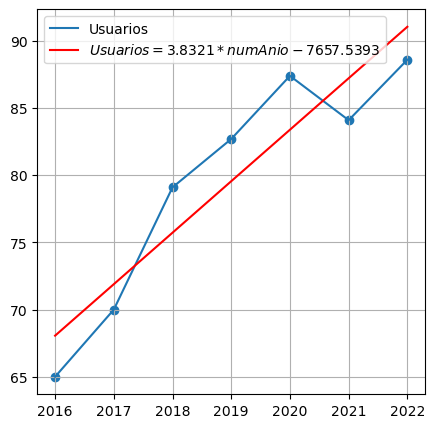

In [241]:
#Gráfica de los datos de la tabla de AMIPCI, regresión lineal de usuarios totales
graph = plt.figure(figsize = (5, 5))
plt.scatter(data_internet['fecha'], data_internet['t_inter'])
plt.plot(data_internet['fecha'], data_internet['t_inter'], label = 'Usuarios')
plt.plot(nFecha, nInter_pred, color = 'red', label = label)
plt.xlabel = ("Año")
plt.ylabel = ("Usuarios con acceso a Internet")
plt.legend()
plt.grid()

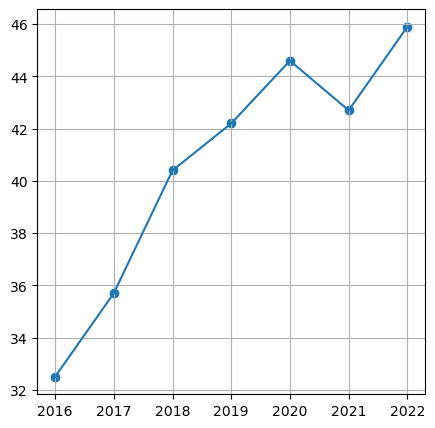

In [259]:
#Gráfica de los datos de la tabla de AMIPCI, regresión lineal de usuarias totales
graph = plt.figure(figsize = (5, 5))
plt.scatter(data_internet['fecha'], data_internet['mujeres'])
plt.plot(data_internet['fecha'], data_internet['mujeres'])
plt.xlabel = ("Año")
plt.ylabel = ("Usuarias con acceso a Internet")
plt.grid()

In [255]:
nFecha = data_internet['fecha'].values.reshape(-1,1)
nMujeres = data_internet['mujeres'].values.reshape(-1,1)

In [256]:
#Regresión lineal de usuarias de internet
linear_regressor = LinearRegression()
linear_regressor.fit(nFecha, nMujeres)
nMujeres_pred = linear_regressor.predict(nFecha)
nMujeres_pred

array([[34.31428571],
       [36.4       ],
       [38.48571429],
       [40.57142857],
       [42.65714286],
       [44.74285714],
       [46.82857143]])

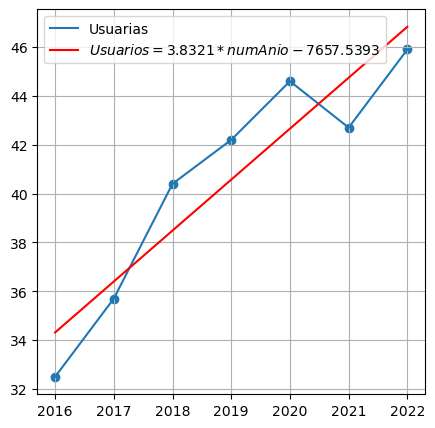

In [258]:
#Gráfica de los datos de la tabla de AMIPCI, regresión lineal de usuarias totales
graph = plt.figure(figsize = (5, 5))
plt.scatter(data_internet['fecha'], data_internet['mujeres'])
plt.plot(data_internet['fecha'], data_internet['mujeres'], label = 'Usuarias')
plt.plot(nFecha, nMujeres_pred, color = 'red', label = label)
plt.xlabel = ("Año")
plt.ylabel = ("Usuarias con acceso a Internet")
plt.legend()
plt.grid()

In [ ]:
# 